<a href="https://colab.research.google.com/github/dekatesakshi677-dotcom/OIBSIP/blob/main/EDA_nutrition_facts_for_macdonald_menu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descriptive Statistics:
           Calories   Total Fat  Saturated Fat       Sodium  Carbohydrates  \
count   260.000000  260.000000     260.000000   260.000000     260.000000   
mean    368.269231   14.165385       6.007692   495.750000      47.346154   
std     240.269886   14.205998       5.321873   577.026323      28.252232   
min       0.000000    0.000000       0.000000     0.000000       0.000000   
25%     210.000000    2.375000       1.000000   107.500000      30.000000   
50%     340.000000   11.000000       5.000000   190.000000      44.000000   
75%     500.000000   22.250000      10.000000   865.000000      60.000000   
max    1880.000000  118.000000      20.000000  3600.000000     141.000000   

          Protein  
count  260.000000  
mean    13.338462  
std     11.426146  
min      0.000000  
25%      4.000000  
50%     12.000000  
75%     19.000000  
max     87.000000  

Mode:
 Calories           0.0
Total Fat          0.0
Saturated Fat      0.0
Sodium           180.0
C

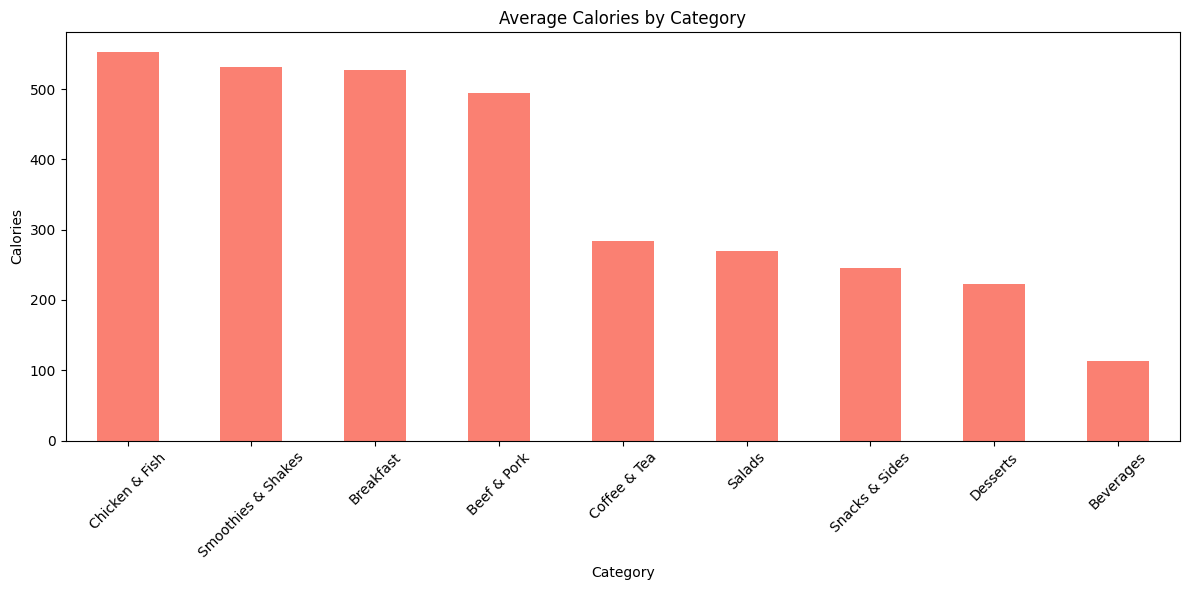

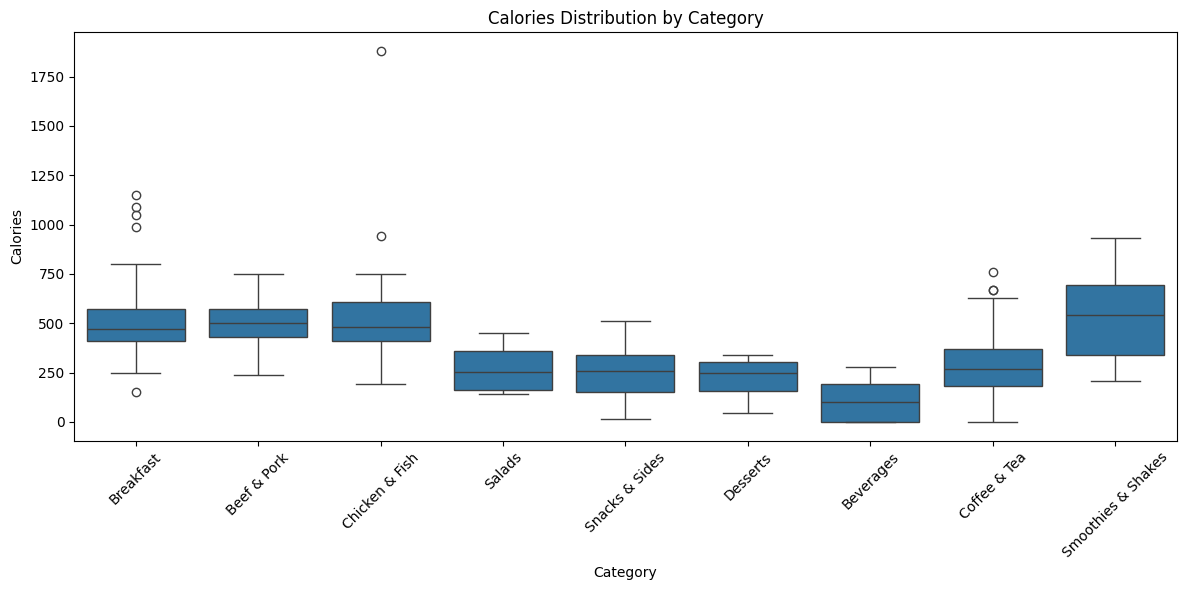

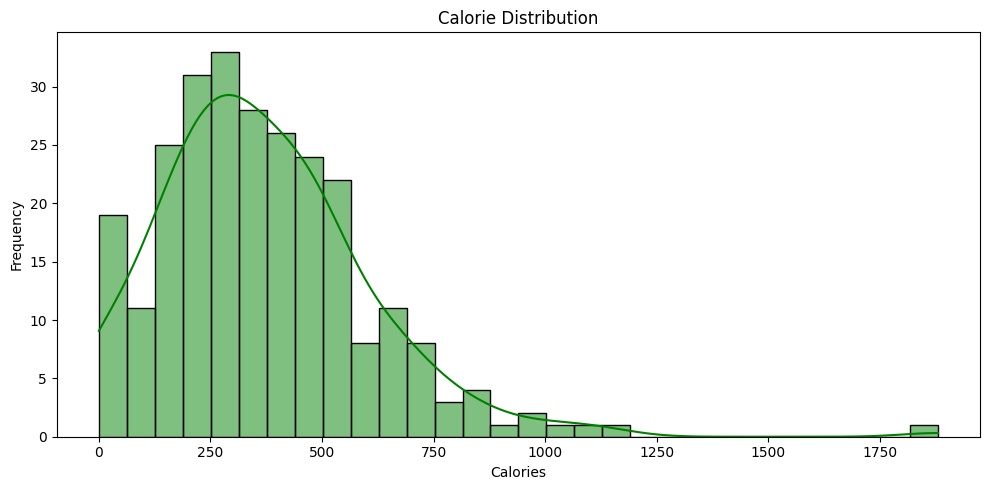

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("menu.csv")

# Clean column names (remove spaces and special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_')

# Convert relevant columns to numeric
nutritional_cols = ['Calories', 'Total Fat', 'Saturated Fat', 'Sodium', 'Carbohydrates', 'Protein'] # Corrected column names based on print output
df[nutritional_cols] = df[nutritional_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=nutritional_cols, inplace=True)

# Descriptive statistics
desc_stats = df[nutritional_cols].describe()
print("Descriptive Statistics:\n", desc_stats)

# Mode
print("\nMode:\n", df[nutritional_cols].mode().iloc[0])

# Average nutritional values by category
category_avg = df.groupby('Category')[nutritional_cols].mean().sort_values(by='Calories', ascending=False)
print("\nAverage Nutrition by Category:\n", category_avg)

# Top 10 high-calorie items
high_cal = df[['Item', 'Calories']].sort_values(by='Calories', ascending=False).head(10)
print("\nTop 10 High-Calorie Items:\n", high_cal)

# Top 10 low-calorie items
low_cal = df[['Item', 'Calories']].sort_values(by='Calories').head(10)
print("\nTop 10 Low-Calorie Items:\n", low_cal)

# Visualization: Average calories by category
plt.figure(figsize=(12,6))
category_avg['Calories'].plot(kind='bar', color='salmon')
plt.title("Average Calories by Category")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Calories distribution by category
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Calories', data=df)
plt.title("Calories Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Overall calorie distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Calories'], bins=30, kde=True, color='green')
plt.title("Calorie Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()